### 1. Prepare the working environment

In [1]:
HOME = "../.." # path to the root of the project two levels up

# Activate the environment
using Pkg
Pkg.activate(HOME)
Pkg.precompile()

  Activating project at `c:\Users\cpaniagu\Documents\IceFloeTracker.jl`

In [2]:
using IceFloeTracker: pairfloes, deserialize, PaddedView, float64, mosaicview, Gray
using DataFrames
imshow(x) = Gray.(x);


### 2. Set thresholds for the algorithm

In [3]:
# Set thresholds
t1 = (dt=(30.0, 100.0, 1300.0), dist=(200, 250, 300))
t2 = (
    area=1200,
    arearatio=0.28,
    majaxisratio=0.10,
    minaxisratio=0.12,
    convexarearatio=0.14,
)
t3 = (
    area=10_000,
    arearatio=0.18,
    majaxisratio=0.1,
    minaxisratio=0.15,
    convexarearatio=0.2,
)
condition_thresholds = (t1, t2, t3)
mc_thresholds = (
    goodness=(area3=0.18, area2=0.236, corr=0.68), comp=(mxrot=10, sz=16)
)
dt = [15.0, 20.0]

2-element Vector{Float64}:
 15.0
 20.0

### 3. Load data

In [4]:
# Load data
pth = joinpath(HOME, "test", "test_inputs", "tracker")
floedata = deserialize(joinpath(pth,"tracker_test_data.dat"))
passtimes = deserialize(joinpath(pth,"passtimes.dat"))

props, imgs = deepcopy(floedata.props), deepcopy(floedata.imgs);

# Filter out floes with area less than 350 pixels
for (i, prop) in enumerate(props)
    props[i] = prop[prop[:, :area].>=350, :]
end

### 4. Pair and label floes

In [5]:
# Get paired floes with labels; other tracking data is in the `tracked` variable
props, tracked = pairfloes(imgs, props, passtimes, dt, condition_thresholds, mc_thresholds);

In [6]:
# Inspect the props table
props

Row,ID,passtime,area,min_row,min_col,max_row,max_col,row_centroid,col_centroid,convex_area,major_axis_length,minor_axis_length,orientation,perimeter,mask
,Int64,DateTime,Int32,Int32,Int32,Int32,Int32,Int64,Int64,Int32,Float64,Float64,Float64,Float64,BitMatrix
1,1,2022-09-14T12:44:49,7184,84,161,172,278,131,225,7688,120.826,78.3764,-1.05495,372.291,Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
2,1,2022-09-14T13:59:19,6966,80,159,166,276,125,222,7464,119.25,77.0107,-1.06836,365.22,Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
3,1,2022-09-15T12:44:49,7184,85,164,171,283,130,228,7684,120.596,78.4321,-1.09051,371.463,Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
4,2,2022-09-14T12:44:49,3043,332,140,419,195,372,168,3315,81.0819,50.611,0.169326,236.35,Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
5,2,2022-09-14T13:59:19,2899,326,134,412,188,366,161,3152,79.1884,49.2248,0.151465,229.522,Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
6,2,2022-09-15T12:44:49,3044,329,135,416,190,369,163,3285,80.6551,50.4261,0.126849,234.108,Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
7,3,2022-09-14T12:44:49,1292,111,436,187,471,152,456,1549,81.3383,21.9157,-0.316888,191.095,Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
8,3,2022-09-14T13:59:19,1176,110,433,185,468,150,453,1442,80.179,20.6145,-0.340923,187.095,Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
9,3,2022-09-15T12:44:49,1291,118,437,194,474,159,458,1563,82.3687,22.0767,-0.358114,193.095,Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]


### 5. Inspect paired floes

In [7]:
# View matching pair of floes with ID = `i`
i = 0

0

Floe ID: 1


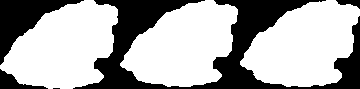

In [8]:
# Run cell several times to view different paired sets of floes
# Note floes with ID in [7, 9] seem to look alike; same for ID's in [8, 10]. Too amorphous to track?

i += 1
println("Floe ID: $i")
try
    floes = props[props.ID.==i, :].mask
    # Get common canvas size for floes in case masks are different sizes and display the pairs
    s = Tuple(maximum(r) for r in eachrow(hcat([collect(size(floe)) for floe in floes]...)))
    imshow(mosaicview([collect(PaddedView(0.0, float64.(img), s)) for img in floes], nrow=1))
catch e
    @info "No floes with ID = $i"
end